## High School Graduation By Income



** Adjusted Cohort Graduation Rate(ACGR)**

**"http://gradnation.americaspromise.org/sites/default/files/d8/2017-05/Appendix_G.pdf", As part of an audit conducted by education officials from Alabama in December 2016, it was announced that the graduation rates of the state were inaccurate because the reports had been calculated improperly, hence the rates of this report may have some inflation, since the graduation rates of Alabama is still included here.**

**2015(%) = number of low-income students, which was divided by the total cohort size for each state.
Estimated non low-income ACGR 2015 (%) = the estimated graduates from all students minus low-income graduates
2015 (%) = the number of low-income students divided by the total cohort size within each state. Estimated Non-Low-Income ACGR (%) = the estimated
graduates from all students minus low-income graduates divided by the estimated total cohort of all students minus low-income within the cohort (i.e.,
using state level ACGRs). Gap Change Between Non-Low-Income and Low-Income ACGR (Percentage Points), 2011-15 = the gap between the estimated
non-low-income and low-income ACGRs from 2010-11 to 2013-15. Therefore, positive values indicate gap closure and negative values indicate gap widening.
Sources: U.S. Department of Education through provisional data file of SY2010-11 and SY 2014-15 State Level Four-Year Regulatory Adjusted Cohort
Graduation Rates and Cohort Counts. Retrieved on November 6, 2016 from http://eddataexpress.ed.gov/state-tables-main.cfm".**

In [45]:
#import dependencies
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [46]:
#https://nces.ed.gov/ccd/tables/ACGR_RE_and_characteristics_2015-16.asp

#data1 = pd.read_excel ('../Resources/ACGR_RE_Characteristics_2015-16.xlsx')
#data1_drop = data1.drop(['American Indian / Alaska Native','Asian1','Hawaiian Native/Pacific Islander1','Hispanic', 'Black','White', 'Two or more races1'],axis=1)
#data1.head()

** Data Source ** 

In [47]:
# http://gradnation.americaspromise.org/sites/default/files/d8/2017-05/Appendix_G.pdf
# used adobe acrobat pro to convert the PDF to excel format
df = pd.read_csv("../Resources/Main_data_AppendixG.csv")
df.head()

,Abb,State,"Gap between Non-Low Income and Low-Income ACGR (Percentage Points), 2011",Overall 2015 ACGR(%),"Percent of Low-Income Students in the Cohort, 2015 (%)",Estimated Non-Low-Income 2015 ACGR(%),Low-Income 2015 ACGR(%),"Gap between Non-Low Income and Low-Income ACGR (Percentage Points, 2015","Gap Change between Non-Low-Income and Low-Income ACGR (Percentage points), 2011-15"
0,AL,Alabama*,19.73,89.3%,49.5%,93.8%,84.7%,9.1,10.6
1,AK,Alaska,18.28,75.6%,35.8%,80.6%,66.6%,14.0,4.2
2,AZ,Arizona,7.94,77.4%,39.7%,80.2%,73.1%,7.1,0.8
3,AR,Arkansas,12.14,84.9%,49.6%,88.1%,81.7%,6.4,5.8
4,CA,California,15.49,82.0%,67.2%,90.2%,78.0%,12.2,3.3


In [48]:
df.tail()

,Abb,State,"Gap between Non-Low Income and Low-Income ACGR (Percentage Points), 2011",Overall 2015 ACGR(%),"Percent of Low-Income Students in the Cohort, 2015 (%)",Estimated Non-Low-Income 2015 ACGR(%),Low-Income 2015 ACGR(%),"Gap between Non-Low Income and Low-Income ACGR (Percentage Points, 2015","Gap Change between Non-Low-Income and Low-Income ACGR (Percentage points), 2011-15"
46,WA,Washington,17.38,78.2%,51.2%,88.8%,68.1%,20.7,-3.3
47,WV,West Virginia,19.86,86.5%,66.4%,93.6%,82.9%,10.7,9.2
48,WI,Wisconsin,18.00,88.4%,32.2%,93.7%,77.3%,16.4,1.6
49,WY,Wyoming,21.66,79.3%,39.6%,88.0%,66.0%,22.0,-0.4
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df.columns

Index(['Abb', 'State',
       'Gap between Non-Low Income \nand Low-Income ACGR (Percentage Points), 2011',
       'Overall 2015 \nACGR(%)',
       'Percent of Low-Income \nStudents in the \nCohort, 2015 (%)',
       'Estimated \nNon-Low-Income 2015 ACGR(%)', 'Low-Income 2015\nACGR(%)',
       'Gap between Non-Low Income \nand Low-Income ACGR\n(Percentage Points, 2015',
       'Gap Change between Non-Low-Income\n and Low-Income ACGR\n(Percentage points), 2011-15'],
      dtype='object')

** Cleanup **

In [50]:
#dropped irrelevant columns
#del df["Percent of Low-Income \nStudents in the \nCohort, 2015 (%)"]
#df

#removed percentage signs, removed † and replace with NaN, format cells as float
df['Low-Income 2015\nACGR(%)'] = df['Low-Income 2015\nACGR(%)'].str.replace('%','').astype(float)
df['Estimated \nNon-Low-Income 2015 ACGR(%)'] = df['Estimated \nNon-Low-Income 2015 ACGR(%)'].str.replace('%','').astype(float)
df['Gap Change between Non-Low-Income\n and Low-Income ACGR\n(Percentage points), 2011-15'] = df['Gap Change between Non-Low-Income\n and Low-Income ACGR\n(Percentage points), 2011-15'].str.replace('†','NaN').astype(float)
df['Overall 2015 \nACGR(%)'] = df['Overall 2015 \nACGR(%)'].str.replace('%','').astype(float)

# drop the last column showing NaN
df = df.drop(df.index[len(df)-1])
df.tail()

,Abb,State,"Gap between Non-Low Income and Low-Income ACGR (Percentage Points), 2011",Overall 2015 ACGR(%),"Percent of Low-Income Students in the Cohort, 2015 (%)",Estimated Non-Low-Income 2015 ACGR(%),Low-Income 2015 ACGR(%),"Gap between Non-Low Income and Low-Income ACGR (Percentage Points, 2015","Gap Change between Non-Low-Income and Low-Income ACGR (Percentage points), 2011-15"
45,VA,Virginia,17.06,85.7,31.8%,90.5,75.4,15.1,1.9
46,WA,Washington,17.38,78.2,51.2%,88.8,68.1,20.7,-3.3
47,WV,West Virginia,19.86,86.5,66.4%,93.6,82.9,10.7,9.2
48,WI,Wisconsin,18.00,88.4,32.2%,93.7,77.3,16.4,1.6
49,WY,Wyoming,21.66,79.3,39.6%,88.0,66.0,22.0,-0.4


### Findings for top and lower 5 states low income students

** In what states are low household income high schoolers, most likely to graduate or not graduate from? ** 

***Ans: Most likely to graduate: Texas, Kentucky, Iowa, Alabama, Indiana ***

*** Less likely to graduate: Oregon, Wyoming, Colorado, Nevada, New Mexico ***

In [51]:
df[ ['State','Low-Income 2015\nACGR(%)'] ].sort_values(by='Low-Income 2015\nACGR(%)', ascending=False).head()

,State,Low-Income 2015 ACGR(%)
42,Texas,85.6
16,Kentucky,84.8
14,Iowa,84.8
0,Alabama*,84.7
13,Indiana,84.2


In [55]:
df[ ['State','Low-Income 2015\nACGR(%)'] ].sort_values(by='Low-Income 2015\nACGR(%)', ascending=False).tail()

,State,Low-Income 2015 ACGR(%)
36,Oregon,66.4
49,Wyoming,66.0
5,Colorado,65.5
27,Nevada,63.7
30,New Mexico,63.5


** What impact does income have on high school graduation rates? **

***Ans: The higher the household income, greater the likelihood of graduation from high school***
    

Text(0,0.5,'Estimated Graduation Rates')

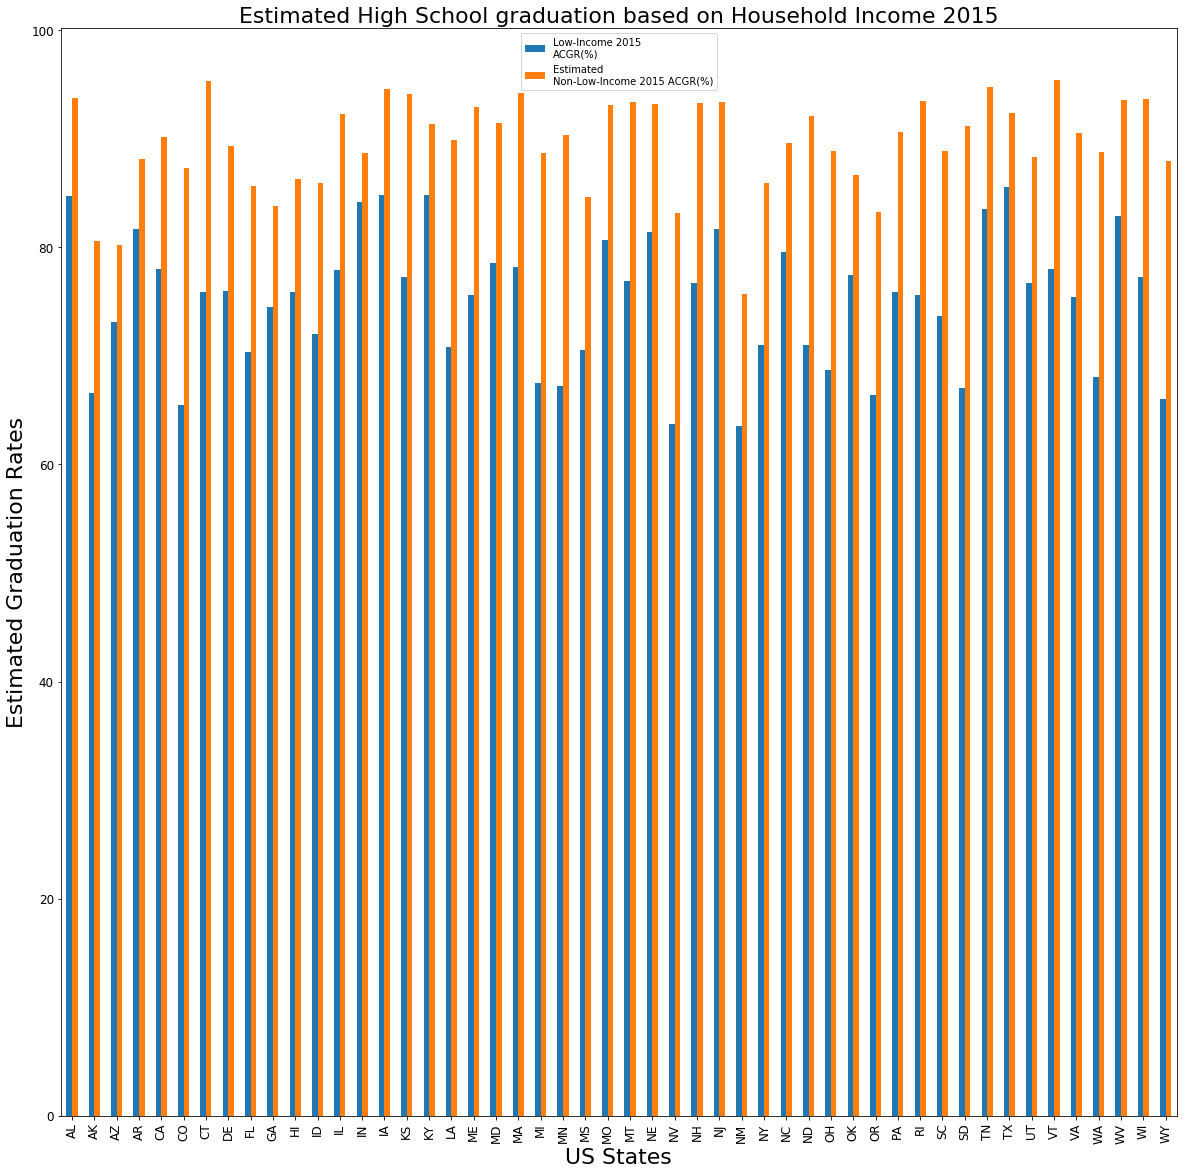

In [53]:
#df.plot(x='Percent of Low-Income \nStudents in the \nCohort, 2015 (%)', y='Estimated \nNon-Low-Income 2015 ACGR(%)')
df.plot(x="Abb",
        y=["Low-Income 2015\nACGR(%)",
          "Estimated \nNon-Low-Income 2015 ACGR(%)"], kind="bar", figsize=(20,20), fontsize=12, legend = True)

plt.title("Estimated High School graduation based on Household Income 2015", size = 22)
plt.xlabel("US States", size = 22)
plt.ylabel("Estimated Graduation Rates", size = 22)


**What States have closed the gap between low-income and non-low-income graduation rates? **

***Ans: Alabama, West Virginia, Connecticut, Indiana, Georgia *** 

In [54]:
df[ ['State', 'Gap Change between Non-Low-Income\n and Low-Income ACGR\n(Percentage points), 2011-15'] ].sort_values(by='Gap Change between Non-Low-Income\n and Low-Income ACGR\n(Percentage points), 2011-15', ascending=False).head()

,State,"Gap Change between Non-Low-Income and Low-Income ACGR (Percentage points), 2011-15"
0,Alabama*,10.6
47,West Virginia,9.2
6,Connecticut,7.9
13,Indiana,6.0
9,Georgia,5.8


Text(0,0.5,'Adjusted Cohort Graduation Rate')

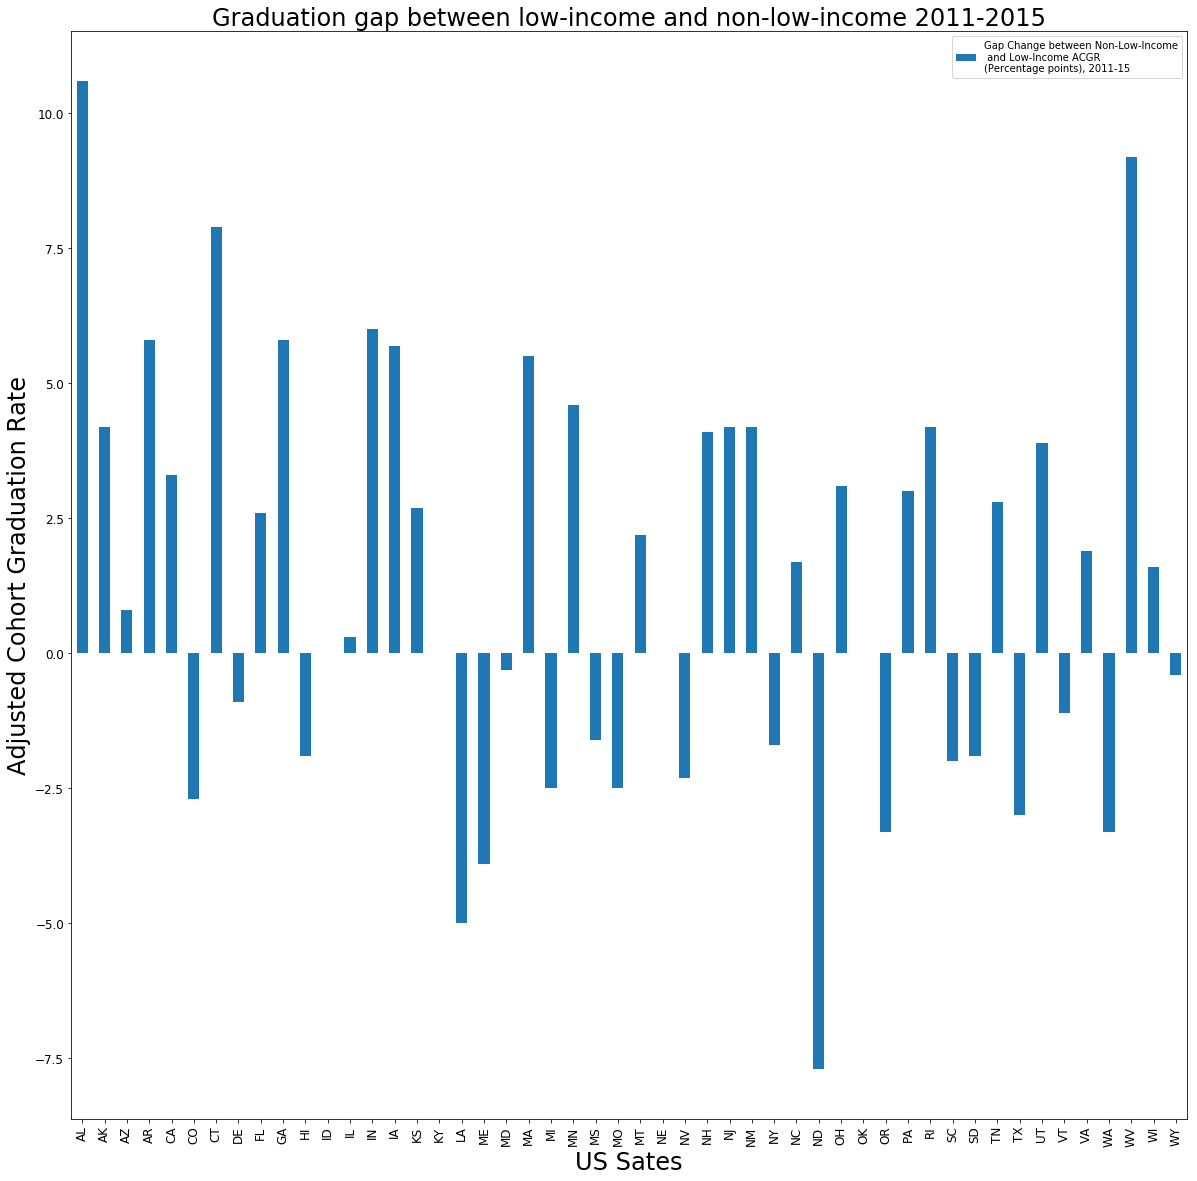

In [44]:
df.plot(x="Abb", y='Gap Change between Non-Low-Income\n and Low-Income ACGR\n(Percentage points), 2011-15', kind="bar", figsize=(20,20), fontsize=12)

plt.title('Graduation gap between low-income and non-low-income 2011-2015', size = 24)
plt.xlabel('US Sates', size=24)
plt.ylabel('Adjusted Cohort Graduation Rate',size=24)

In [56]:
!pwd

/c/Users/Gloria/Desktop/UTAUS201801DATA2-Class-Repository-DATA/group_project_data/project-one-after-seth/DataSets
